# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

# File to Load (Remember to check these)
city_data_to_load =os.path.join("Resources/city_data.csv")
ride_data_to_load =os.path.join("Resources/ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [3]:
#  1. Get the total rides for each city type
total_per_ride=pyber_data_df.groupby(["type"])
total_per_ride["ride_id"].count()
total_per_ride=total_per_ride["ride_id"].count()
total_per_ride

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_per_driver=city_data_df.groupby(["type"])

total_per_driver["driver_count"].sum()

total_per_driver=total_per_driver["driver_count"].sum()

total_per_driver

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_per_fare=pyber_data_df.groupby(["type"])

total_per_fare["fare"].sum()
total_per_fare=total_per_fare["fare"].sum()
total_per_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_per_fare=total_per_fare/total_per_ride

avg_per_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_drive_fare=total_per_fare/total_per_driver
avg_drive_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame ({"Total Rides":total_per_ride,
                    "Total Drivers":total_per_driver,
                    "Total Fares":total_per_fare,
                     "Average Fare per Ride":avg_per_fare,
                     "Average Fare per Driver":avg_drive_fare})
pyber_summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
## formate cells by using pd.options.display.flot_format='$f{:,.2f}'.format
pd.options.display.float_format = '${:,.2f}'.format
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# Print the merged DataFrame for reference.
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,$9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,$43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,$35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,$35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,$42.81,5327642267789,33,Urban


In [20]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

## using double brackets on "fare" would create a dataframe
date_type_fare=pyber_data_df.groupby(["date","type"]).sum()[["fare"]]

date_type_fare.head(10)

## put date and type in separate columns by using .reset_index()

,,fare
date,type,
2019-01-01 00:08:16,Urban,$37.91
2019-01-01 00:46:46,Suburban,$47.74
2019-01-01 02:07:24,Suburban,$24.07
2019-01-01 03:46:50,Urban,$7.57
2019-01-01 05:23:21,Urban,$10.75
2019-01-01 09:45:36,Rural,$43.69
2019-01-01 12:32:48,Suburban,$25.56
2019-01-01 14:40:14,Urban,$5.42
2019-01-01 14:42:25,Urban,$12.31


In [13]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

## reset_index() gives single entry for each date and city type also, makes it possible for
## data to in placed in pivot plot
date_type_fare=date_type_fare.reset_index()

date_type_fare.head(10)

## now create the pivot table

,date,type,fare
0,2019-01-01 00:08:16,Urban,$37.91
1,2019-01-01 00:46:46,Suburban,$47.74
2,2019-01-01 02:07:24,Suburban,$24.07
3,2019-01-01 03:46:50,Urban,$7.57
4,2019-01-01 05:23:21,Urban,$10.75
5,2019-01-01 09:45:36,Rural,$43.69
6,2019-01-01 12:32:48,Suburban,$25.56
7,2019-01-01 14:40:14,Urban,$5.42
8,2019-01-01 14:42:25,Urban,$12.31
9,2019-01-01 14:52:06,Suburban,$31.15


In [14]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

date_type_fare=date_type_fare.pivot(index="date",columns="type", values="fare")


In [15]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.

date_type_fare=date_type_fare.loc['2019-01-01':'2019-04-28']

date_type_fare

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-04-27 17:58:27,$14.01,NaN,NaN
2019-04-27 19:45:48,NaN,$28.84,NaN
2019-04-27 20:41:36,NaN,NaN,$8.28


In [16]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

date_type_fare.index=pd.to_datetime(date_type_fare.index)

# run date_type_fare to make the changes to the index


date_type_fare


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-04-27 17:58:27,$14.01,NaN,NaN
2019-04-27 19:45:48,NaN,$28.84,NaN
2019-04-27 20:41:36,NaN,NaN,$8.28


In [17]:
# 6. Check that the datatype for the index is datetime using df.info()
date_type_fare.info()


## when you check info index: is changed to DateTimeIndex:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [18]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
week_profit=date_type_fare.resample("W").sum()

week_profit


type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


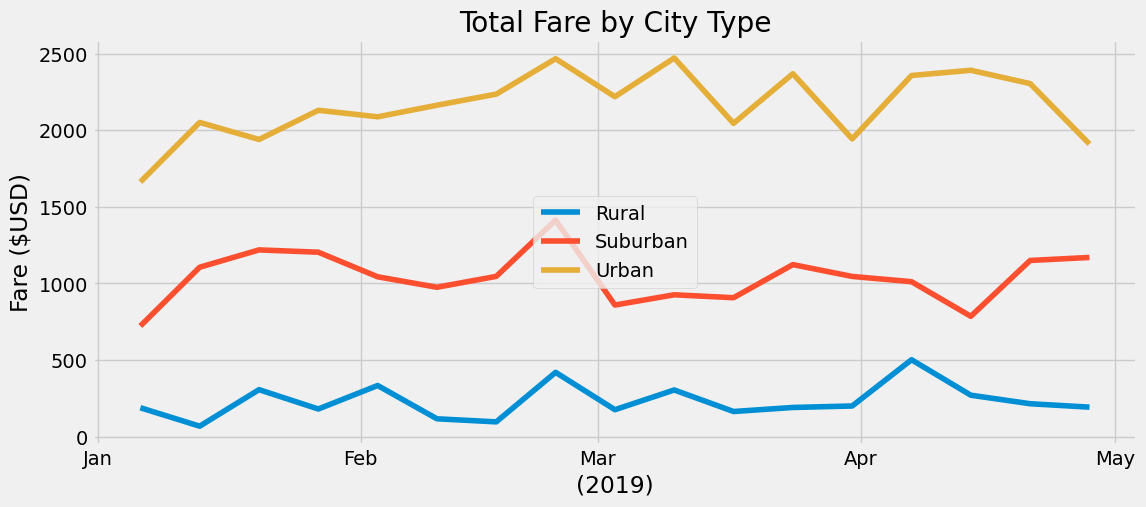

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

#import matplotlib.dates as mdates
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(12,5))

plt.plot(week_profit)

ax.legend(["Rural","Suburban","Urban"])
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("(2019)")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%b"))

#save fig
plt.savefig("./PyBer_fare_summary.png")